In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

**Read data**

In [21]:
temp_zuz = pd.read_csv('data/temp_zuz.csv', delimiter=';')
temp_zuz['Czas'] = pd.to_datetime(temp_zuz['Czas'])

In [22]:
df = pd.read_csv('data/data.csv')
df['czas'] = pd.to_datetime(df['czas'])

In [23]:
df.shape

(540492, 58)

In [24]:
temp_zuz.shape

(11384, 2)

In [25]:
df.head()

,czas,001fcx00211.pv,001fcx00221.pv,001fcx00231.pv,001fcx00241.pv,001fir01307.daca.pv,001fir01308.daca.pv,001fir01309.daca.pv,001fir01310.daca.pv,001fir01311.daca.pv,...,001uxm0rf01.daca.pv,001uxm0rf02.daca.pv,001uxm0rf03.daca.pv,037tix00254.daca.pv,037tix00264.daca.pv,prazonka_fe,prazonka_s,prob_corg,prob_fe,prob_s
0,2020-10-01 00:00:00+02:00,56.729077,54.724422,11.966905,22.493207,108.702362,112.280388,110.013796,108.761583,110.604901,...,92.090454,92.024078,92.405281,24.665309,24.526161,4.48,8.98,8.6,4.55,9.87
1,2020-10-01 00:01:00+02:00,54.771942,54.734675,12.026410,22.593412,108.846612,112.334600,109.906645,108.879083,110.644046,...,92.090534,92.024206,92.405239,24.663982,24.526161,4.48,8.98,8.6,4.55,9.87
2,2020-10-01 00:02:00+02:00,54.695816,54.774163,11.953671,22.428933,108.827640,112.362508,109.970932,108.844765,110.621665,...,92.090613,92.024334,92.405196,24.662656,24.526161,4.48,8.98,8.6,4.55,9.87
3,2020-10-01 00:03:00+02:00,54.154394,54.985713,12.052065,22.335388,108.623473,112.386061,109.836948,108.717994,110.464245,...,92.090692,92.024462,92.405153,24.661329,24.526161,4.48,8.98,8.6,4.55,9.87
4,2020-10-01 00:04:00+02:00,54.693184,54.490742,12.027310,22.412620,108.746784,112.396792,109.966910,108.978605,110.603660,...,92.090771,92.024590,92.405110,24.660003,24.525475,4.48,8.98,8.6,4.55,9.87


In [26]:
temp_zuz.head()

,Czas,temp_zuz
0,2020-10-01 00:00:00,1297
1,2020-10-01 01:00:00,1295
2,2020-10-01 02:00:00,1303
3,2020-10-01 02:30:00,1302
4,2020-10-01 03:00:00,1303


**Simple feature engineering**

In [27]:
# średnia woda powrotna kolektora
TIR = df.columns[df.columns.str.contains('tir')].values
df["avg_woda_powrotna"] = df[TIR].mean(axis=1)
df = df.drop(TIR, axis=1)
df.head()

,czas,001fcx00211.pv,001fcx00221.pv,001fcx00231.pv,001fcx00241.pv,001fir01307.daca.pv,001fir01308.daca.pv,001fir01309.daca.pv,001fir01310.daca.pv,001fir01311.daca.pv,...,001uxm0rf02.daca.pv,001uxm0rf03.daca.pv,037tix00254.daca.pv,037tix00264.daca.pv,prazonka_fe,prazonka_s,prob_corg,prob_fe,prob_s,avg_woda_powrotna
0,2020-10-01 00:00:00+02:00,56.729077,54.724422,11.966905,22.493207,108.702362,112.280388,110.013796,108.761583,110.604901,...,92.024078,92.405281,24.665309,24.526161,4.48,8.98,8.6,4.55,9.87,29.086390
1,2020-10-01 00:01:00+02:00,54.771942,54.734675,12.026410,22.593412,108.846612,112.334600,109.906645,108.879083,110.644046,...,92.024206,92.405239,24.663982,24.526161,4.48,8.98,8.6,4.55,9.87,29.087996
2,2020-10-01 00:02:00+02:00,54.695816,54.774163,11.953671,22.428933,108.827640,112.362508,109.970932,108.844765,110.621665,...,92.024334,92.405196,24.662656,24.526161,4.48,8.98,8.6,4.55,9.87,29.094825
3,2020-10-01 00:03:00+02:00,54.154394,54.985713,12.052065,22.335388,108.623473,112.386061,109.836948,108.717994,110.464245,...,92.024462,92.405153,24.661329,24.526161,4.48,8.98,8.6,4.55,9.87,29.098936
4,2020-10-01 00:04:00+02:00,54.693184,54.490742,12.027310,22.412620,108.746784,112.396792,109.966910,108.978605,110.603660,...,92.024590,92.405110,24.660003,24.525475,4.48,8.98,8.6,4.55,9.87,29.096812


In [28]:
# średnia woda chłodząca kolektora
FIR = df.columns[df.columns.str.contains('fir')].values
df["avg_woda_chlodzaca"] = df[FIR].mean(axis=1)
df = df.drop(FIR, axis=1)
df.head()

,czas,001fcx00211.pv,001fcx00221.pv,001fcx00231.pv,001fcx00241.pv,001nir0szr0.daca.pv,001tix01063.daca.pv,001tix01064.daca.pv,001tix01065.daca.pv,001tix01066.daca.pv,...,001uxm0rf03.daca.pv,037tix00254.daca.pv,037tix00264.daca.pv,prazonka_fe,prazonka_s,prob_corg,prob_fe,prob_s,avg_woda_powrotna,avg_woda_chlodzaca
0,2020-10-01 00:00:00+02:00,56.729077,54.724422,11.966905,22.493207,14.362428,385.911908,421.166412,455.862854,435.741310,...,92.405281,24.665309,24.526161,4.48,8.98,8.6,4.55,9.87,29.086390,113.360791
1,2020-10-01 00:01:00+02:00,54.771942,54.734675,12.026410,22.593412,14.381825,385.917027,421.166412,455.862427,435.739176,...,92.405239,24.663982,24.526161,4.48,8.98,8.6,4.55,9.87,29.087996,113.354389
2,2020-10-01 00:02:00+02:00,54.695816,54.774163,11.953671,22.428933,14.359413,385.922148,421.166412,455.862000,435.737043,...,92.405196,24.662656,24.526161,4.48,8.98,8.6,4.55,9.87,29.094825,113.383070
3,2020-10-01 00:03:00+02:00,54.154394,54.985713,12.052065,22.335388,14.353036,385.927267,421.166412,455.861572,435.734911,...,92.405153,24.661329,24.526161,4.48,8.98,8.6,4.55,9.87,29.098936,113.281268
4,2020-10-01 00:04:00+02:00,54.693184,54.490742,12.027310,22.412620,14.392053,385.932387,421.166412,455.861145,435.732775,...,92.405110,24.660003,24.525475,4.48,8.98,8.6,4.55,9.87,29.096812,113.380821


In [29]:
# średnia temperatura pod warstwą wymurówki
TIX = df.columns[df.columns.str.contains('tix')].values
df["avg_temp_pod"] = df[TIX].mean(axis=1)
df = df.drop(TIX, axis=1)
df.head()

,czas,001fcx00211.pv,001fcx00221.pv,001fcx00231.pv,001fcx00241.pv,001nir0szr0.daca.pv,001txi01153.daca.pv,001txi01154.daca.pv,001uxm0rf01.daca.pv,001uxm0rf02.daca.pv,001uxm0rf03.daca.pv,prazonka_fe,prazonka_s,prob_corg,prob_fe,prob_s,avg_woda_powrotna,avg_woda_chlodzaca,avg_temp_pod
0,2020-10-01 00:00:00+02:00,56.729077,54.724422,11.966905,22.493207,14.362428,19.126427,19.929581,92.090454,92.024078,92.405281,4.48,8.98,8.6,4.55,9.87,29.086390,113.360791,388.652871
1,2020-10-01 00:01:00+02:00,54.771942,54.734675,12.026410,22.593412,14.381825,19.125526,19.942439,92.090534,92.024206,92.405239,4.48,8.98,8.6,4.55,9.87,29.087996,113.354389,388.651983
2,2020-10-01 00:02:00+02:00,54.695816,54.774163,11.953671,22.428933,14.359413,19.124626,19.919802,92.090613,92.024334,92.405196,4.48,8.98,8.6,4.55,9.87,29.094825,113.383070,388.651095
3,2020-10-01 00:03:00+02:00,54.154394,54.985713,12.052065,22.335388,14.353036,19.123726,19.861671,92.090692,92.024462,92.405153,4.48,8.98,8.6,4.55,9.87,29.098936,113.281268,388.650208
4,2020-10-01 00:04:00+02:00,54.693184,54.490742,12.027310,22.412620,14.392053,19.122826,19.803541,92.090771,92.024590,92.405110,4.48,8.98,8.6,4.55,9.87,29.096812,113.380821,388.649294


In [30]:
df.shape

(540492, 19)

**Shuffle data and split**

In [31]:
new_df = pd.concat([df, temp_zuz], axis=1)
new_df = new_df.drop(["czas"], axis=1)
new_df = new_df.dropna(axis=0)
new_df = new_df.sample(frac=1)

In [32]:
new_df

,001fcx00211.pv,001fcx00221.pv,001fcx00231.pv,001fcx00241.pv,001nir0szr0.daca.pv,001txi01153.daca.pv,001txi01154.daca.pv,001uxm0rf01.daca.pv,001uxm0rf02.daca.pv,001uxm0rf03.daca.pv,prazonka_fe,prazonka_s,prob_corg,prob_fe,prob_s,avg_woda_powrotna,avg_woda_chlodzaca,avg_temp_pod,Czas,temp_zuz
6832,58.882830,57.694247,15.087206,24.777765,14.279401,21.596911,21.695472,92.096653,92.077703,92.404314,4.50,8.58,8.92,4.51,9.73,29.329625,113.508918,391.120987,2021-07-19 06:00:00,1308.0
8289,58.748988,58.597034,9.978252,26.158314,15.305425,20.632706,20.819640,92.095218,92.071793,92.410286,4.48,8.44,8.66,4.45,9.75,28.975634,113.472857,390.582879,2021-09-19 11:00:00,1297.0
7088,57.042289,56.801825,13.886834,25.950680,14.132289,18.392373,18.321509,92.095721,92.042708,92.405396,4.54,9.01,8.86,4.41,9.88,29.189914,113.526819,390.132929,2021-07-29 17:00:00,1306.0
9254,59.782113,60.090162,13.051991,28.183774,15.361459,21.249724,21.201400,92.088045,92.042548,92.405161,4.32,7.94,8.74,4.55,9.98,28.928805,113.606943,389.330867,2021-11-01 09:00:00,1301.0
2924,56.002672,56.252418,14.067507,25.015755,13.594955,17.738721,18.287821,92.079305,92.069693,92.404534,4.18,7.96,9.27,4.53,9.72,28.897602,113.168048,388.582576,2021-02-04 08:00:00,1304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,54.976869,55.096481,12.107441,25.055432,14.743173,19.434999,19.763954,92.086777,92.061554,92.405396,4.28,8.07,8.62,4.55,9.75,29.069782,113.555996,388.980963,2020-11-21 20:00:00,1307.0
3447,57.034097,57.000000,12.086322,22.742388,13.882887,20.625845,21.049520,92.143051,92.047814,92.405396,4.40,8.75,8.67,4.54,9.51,28.825325,113.359765,388.828708,2021-02-25 18:00:00,1308.0
10061,59.607348,59.811892,12.127400,23.276874,17.422510,17.998646,17.931474,92.142090,92.076904,92.396410,4.48,8.84,8.84,4.47,9.61,28.731069,113.265435,389.339177,2021-12-06 15:00:00,1300.0
8294,60.122568,59.717934,9.873075,25.789245,15.353347,20.609018,20.808389,92.094796,92.071793,92.408792,4.48,8.44,8.66,4.45,9.75,29.003809,113.547971,390.584456,2021-09-19 16:00:00,1305.0


In [33]:
new_df.shape

(11384, 20)

### Correlation matrix

In [34]:
feature_desc_df = pd.read_csv('data_processing/feature_desc.csv', index_col='name')
def feature_desc(name):
        try:
            if type(name)==str:
                return feature_desc_df.loc[name]['desc']
            else:
                return feature_desc_df.loc[name]['desc'].values
        except:
            return name

In [35]:
col_names = list(new_df.columns.values)

for col_name in col_names:
    new_df = new_df.rename(columns={col_name: feature_desc(col_name)})


<AxesSubplot:>

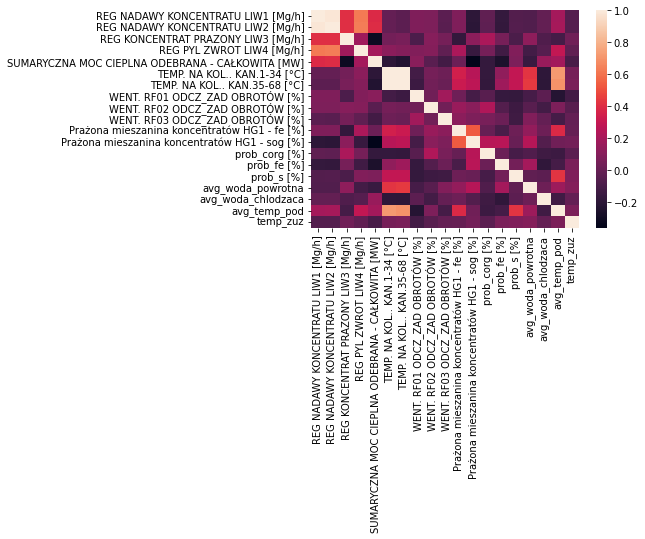

In [36]:
import seaborn as sns

# calculate the correlation matrix
corr = new_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### Splitting data

In [38]:
train = new_df.iloc[:int(new_df.shape[0] * 0.9)]
test = new_df.iloc[int(new_df.shape[0] * 0.9):]

In [39]:
train_X = np.asarray(train.drop(["temp_zuz", "Czas"], axis=1)).astype(np.float32)
test_X = test.drop(["temp_zuz", "Czas"], axis=1)
train_Y = np.asarray(train["temp_zuz"]).astype(np.float32)
test_Y = np.asarray(test["temp_zuz"]).astype(np.float32)

In [40]:
train_Y

array([1308., 1297., 1306., ..., 1309., 1308., 1299.], dtype=float32)

**A very simple neural network**

In [41]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(8),
                             tf.keras.layers.Dense(4),
                             tf.keras.layers.Dense(2),
                             tf.keras.layers.Dense(1)
])
model.compile( loss = tf.keras.losses.mae, #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.Adam(), #stochastic GD
              metrics = ['mae'])
model.fit(train_X, train_Y, epochs = 100)

2022-03-12 12:12:04.316504: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-12 12:12:04.316948: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/przemek/projects/space_systems/ws_core/devel/lib:/home/przemek/projects/space_systems/ws_arm/devel/lib:/opt/ros/noetic/lib:/opt/ros/noetic/lib/x86_64-linux-gnu
2022-03-12 12:12:04.317153: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/przemek/projects/space_systems/ws_core/devel/lib:/home/przemek/projects/space_systems/ws_arm/devel/lib:/opt/ros/noet

Epoch 1/100
321/321 [==============================] - 1s 634us/step - loss: 594.8713 - mae: 594.8713
Epoch 2/100
321/321 [==============================] - 0s 648us/step - loss: 13.9873 - mae: 13.9873
Epoch 3/100
321/321 [==============================] - 0s 699us/step - loss: 12.4984 - mae: 12.4984
Epoch 4/100
321/321 [==============================] - 0s 1ms/step - loss: 10.9685 - mae: 10.9685
Epoch 5/100
321/321 [==============================] - 0s 1ms/step - loss: 9.3361 - mae: 9.3361
Epoch 6/100
321/321 [==============================] - 0s 976us/step - loss: 8.4971 - mae: 8.4971
Epoch 7/100
321/321 [==============================] - 0s 1ms/step - loss: 7.3333 - mae: 7.3333
Epoch 8/100
321/321 [==============================] - 0s 901us/step - loss: 6.6574 - mae: 6.6574
Epoch 9/100
321/321 [==============================] - 0s 778us/step - loss: 6.1653 - mae: 6.1653
Epoch 10/100
321/321 [==============================] - 0s 869us/step - loss: 5.7875 - mae: 5.7875
Epoch 11/100
32

321/321 [==============================] - 0s 653us/step - loss: 5.3391 - mae: 5.3391
Epoch 84/100
321/321 [==============================] - 0s 662us/step - loss: 5.3847 - mae: 5.3847
Epoch 85/100
321/321 [==============================] - 0s 689us/step - loss: 5.4025 - mae: 5.4025
Epoch 86/100
321/321 [==============================] - 0s 623us/step - loss: 5.2487 - mae: 5.2487
Epoch 87/100
321/321 [==============================] - 0s 618us/step - loss: 5.3149 - mae: 5.3149
Epoch 88/100
321/321 [==============================] - 0s 687us/step - loss: 5.3954 - mae: 5.3954
Epoch 89/100
321/321 [==============================] - 0s 702us/step - loss: 5.3294 - mae: 5.3294
Epoch 90/100
321/321 [==============================] - 0s 703us/step - loss: 5.2658 - mae: 5.2658
Epoch 91/100
321/321 [==============================] - 0s 705us/step - loss: 5.4464 - mae: 5.4464
Epoch 92/100
321/321 [==============================] - 0s 666us/step - loss: 5.4120 - mae: 5.4120
Epoch 93/100
321/321 [=

In [42]:
# test data
pred = model.predict(test_X)
mae = tf.metrics.mean_absolute_error(y_true=test_Y, 
                                     y_pred=pred.squeeze()).numpy()
mse = tf.metrics.mean_squared_error(y_true = test_Y,
                                      y_pred=pred.squeeze()).numpy()
print(mae, mse)

5.3987007 58.54671


**Linear Regression**

In [43]:
regr = linear_model.LinearRegression()

In [44]:
regr.fit(train_X, train_Y)

LinearRegression()

In [45]:
y_pred = regr.predict(test_X)

/home/przemek/.local/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [46]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_Y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_Y, y_pred))

Coefficients: 
 [-1.01075068e-01 -2.16252841e-02  1.19583845e-01  1.06870256e-01
 -4.19023573e-01 -7.27300465e-01  2.36290812e-01 -2.47379475e+01
 -1.72938957e+01  1.76127682e+01 -1.16166711e+00  1.78451508e-01
 -2.59951425e+00  3.58963680e+00  1.74391818e+00  1.68508673e+00
 -1.72695026e-01  1.14784718e+00]
Mean squared error: 54.80
Coefficient of determination: 0.03


### Experiments with lagged features

In [57]:
new_df.head(5)

,level_0,index,REG NADAWY KONCENTRATU LIW1 [Mg/h],REG NADAWY KONCENTRATU LIW2 [Mg/h],REG KONCENTRAT PRAZONY LIW3 [Mg/h],REG PYL ZWROT LIW4 [Mg/h],SUMARYCZNA MOC CIEPLNA ODEBRANA - CAŁKOWITA [MW],TEMP. NA KOL.. KAN.1-34 [°C],TEMP. NA KOL.. KAN.35-68 [°C],WENT. RF01 ODCZ_ZAD OBROTÓW [%],...,Prażona mieszanina koncentratów HG1 - fe [%],Prażona mieszanina koncentratów HG1 - sog [%],prob_corg [%],prob_fe [%],prob_s [%],avg_woda_powrotna,avg_woda_chlodzaca,avg_temp_pod,Czas,temp_zuz
0,0,6832,58.882830,57.694247,15.087206,24.777765,14.279401,21.596911,21.695472,92.096653,...,4.50,8.58,8.92,4.51,9.73,29.329625,113.508918,391.120987,2021-07-19 06:00:00,1308.0
1,1,8289,58.748988,58.597034,9.978252,26.158314,15.305425,20.632706,20.819640,92.095218,...,4.48,8.44,8.66,4.45,9.75,28.975634,113.472857,390.582879,2021-09-19 11:00:00,1297.0
2,2,7088,57.042289,56.801825,13.886834,25.950680,14.132289,18.392373,18.321509,92.095721,...,4.54,9.01,8.86,4.41,9.88,29.189914,113.526819,390.132929,2021-07-29 17:00:00,1306.0
3,3,9254,59.782113,60.090162,13.051991,28.183774,15.361459,21.249724,21.201400,92.088045,...,4.32,7.94,8.74,4.55,9.98,28.928805,113.606943,389.330867,2021-11-01 09:00:00,1301.0
4,4,2924,56.002672,56.252418,14.067507,25.015755,13.594955,17.738721,18.287821,92.079305,...,4.18,7.96,9.27,4.53,9.72,28.897602,113.168048,388.582576,2021-02-04 08:00:00,1304.0


In [56]:
from data_processing.data_processing import aggregate

agg_df = aggregate(new_df, 10)

agg_df.head(5)

ValueError: cannot insert level_0, already exists